In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
from enhancement_analysis import *
from fit_functions import *
from low_level import readCSVrows,writeCSVrows,calcEnhancement,readCSVcolumns
%matplotlib inline


In [96]:
results=readCSVcolumns('Processed_20190329/data_legend_gas_430mW.csv',skip_header=1)
header = results[1]
print(header)
[iv,starts,stops]= results[0]

Done! Array read from Processed_20190329/data_legend_gas_430mW.csv
[['Gas (SCCM)', 'Start', 'Stop']]


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

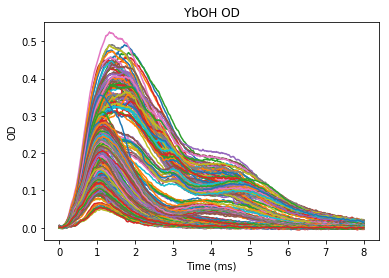

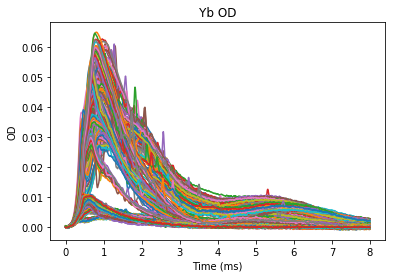

In [97]:
folder = '20190329'
skips = []
ABAB = True

start_arr = starts.astype(int)
stop_arr = stops.astype(int)
iv_arr = iv

enhancement = []

b_ODs = []
ub_ODs = []

for _start,_stop in zip(start_arr,stop_arr):
    
    ODs_1 = calculateSeriesOD(folder,_start,_stop,skips,ABAB=ABAB)
    ODs_2 = calculateSeriesOD(folder,_start+1,_stop,skips,ABAB=ABAB)
    
    p_1 = processData(ODs_1,[0,8])
    p_2 = processData(ODs_2,[0,8])
    b,ub = identifyBUB(p_1,p_2,equal=True)
    b_ODs.append(b)
    ub_ODs.append(ub)
#p=YbOH integrated, Yb integrated, timestamp

In [98]:
en_ch1 = []
en_ch2 = []
for _b,_ub in zip(b_ODs,ub_ODs):
    _en1 = calcEnhancement(_b[0],_ub[0])
    en_ch1.append(_en1)
    _en2 = calcEnhancement(_b[1],_ub[1])
    en_ch2.append(_en2)

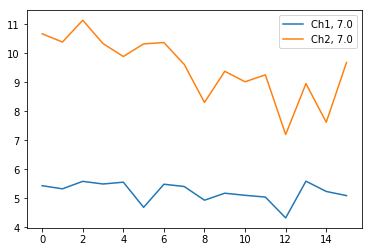

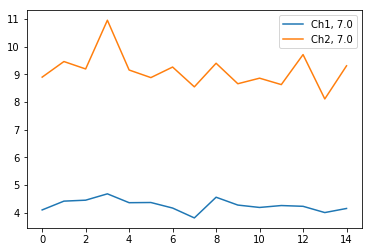

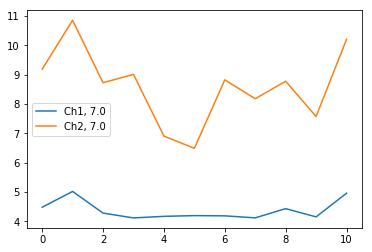

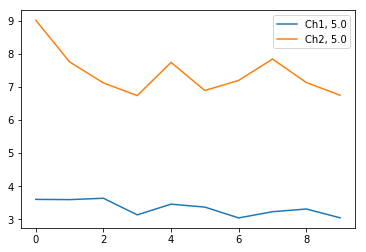

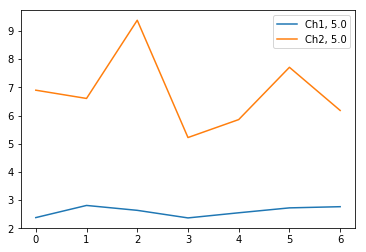

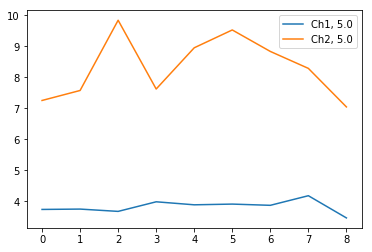

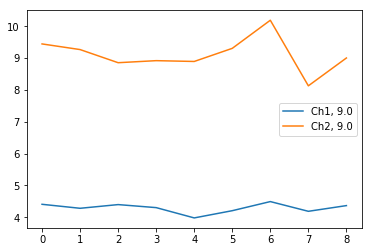

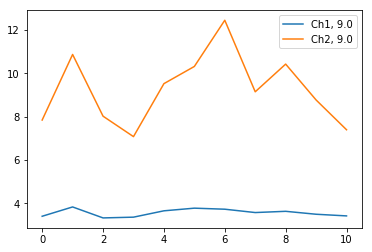

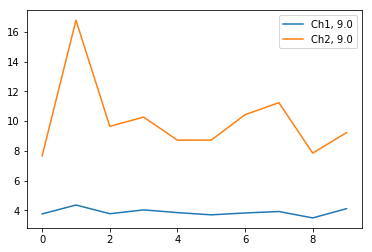

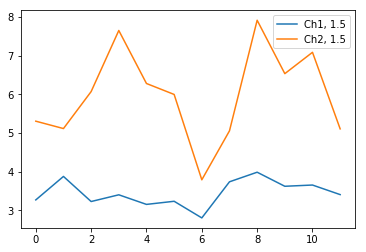

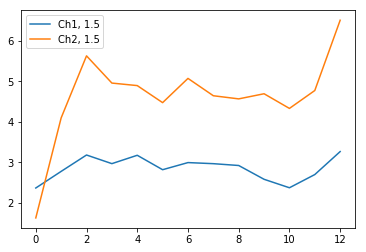

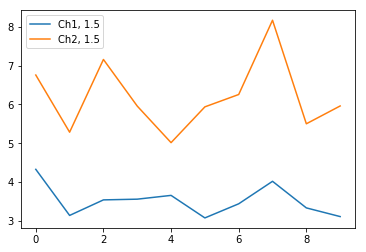

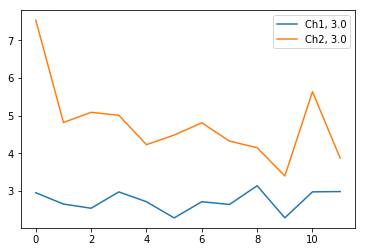

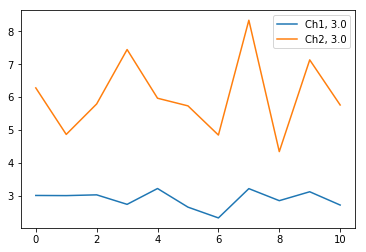

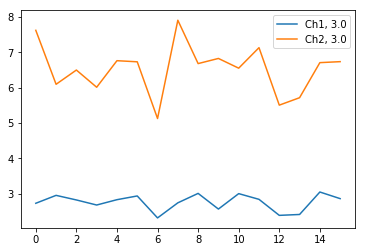

In [99]:
cell = []
err_cell = []
front = []
err_front = []
for _en1,_en2,_iv in zip(en_ch1,en_ch2,iv):
    plt.figure()
    plt.plot(_en1,label='Ch1, {}'.format(_iv))
    plt.plot(_en2,label='Ch2, {}'.format(_iv))
    plt.legend(loc='best')
    cell.append(np.array(_en1).mean())
    err_cell.append(np.array(_en1).std())
    front.append(np.array(_en2).mean())
    err_front.append(np.array(_en2).std())

In [100]:
en_cell_sort = np.array(sortData(iv,cell))
err_cell_sort = np.array(sortData(iv,err_cell))
en_front_sort = np.array(sortData(iv,front))
err_front_sort = np.array(sortData(iv,err_front))
iv_sort = np.array(sorted(iv))

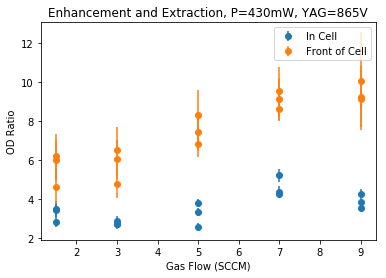

In [102]:
plt.figure()
plt.title('Enhancement and Extraction, P=430mW, YAG=865V')
plt.xlabel('Gas Flow (SCCM)')
plt.ylabel('OD Ratio')
plt.errorbar(iv_sort,en_cell_sort,yerr=err_cell_sort,marker='o',linestyle='None',label='In Cell')
plt.errorbar(iv_sort,en_front_sort,yerr=err_front_sort,marker='o',linestyle='None',label='Front of Cell')
plt.legend(loc='best')

In [103]:
lbls = ['Gas Flow (SCCM)','In Cell Enhancement','In Cell StDev','Front of Cell Enhancement','Front of Cell StDev']
data = np.array([np.array(iv_sort),np.array(en_cell_sort),np.array(err_cell_sort),np.array(en_front_sort),np.array(err_front_sort)])
save_all = []
save_all.append(lbls)
for _data in data.T:
    save_all.append(_data)
writeCSVrows(save_all,'Processed_20190329/Enhancement_InCell_FrontCell_vs_Gas_430mW.csv')

Done! Array written to Processed_20190329/Enhancement_InCell_FrontCell_vs_Gas_430mW.csv


In [104]:
cell_b = []
cell_ub = []
front_b = []
front_ub = []
for b,ub in zip(b_ODs,ub_ODs):
    cell_b.append(b[0])
    front_b.append(b[1])
    cell_ub.append(ub[0])
    front_ub.append(ub[1])

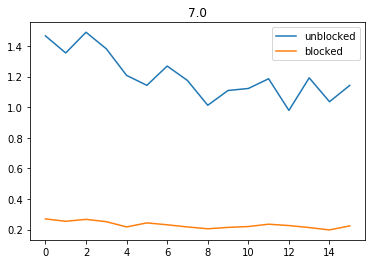

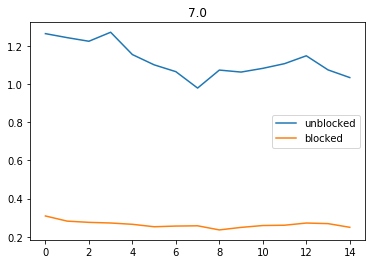

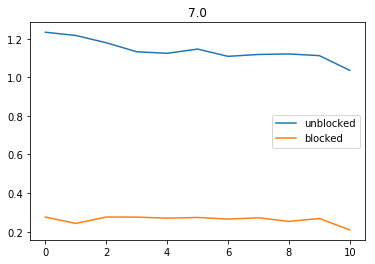

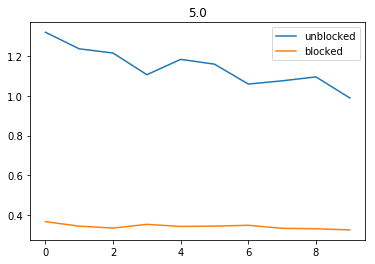

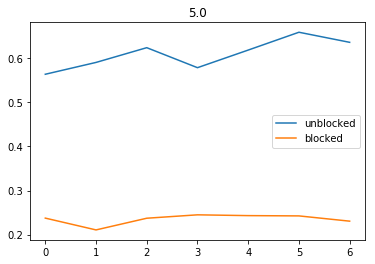

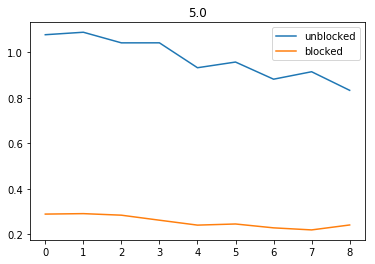

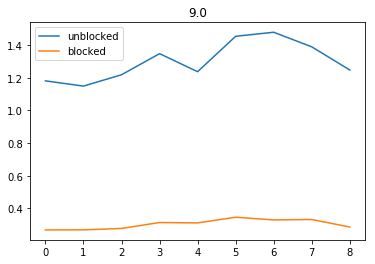

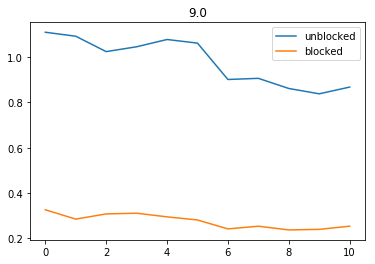

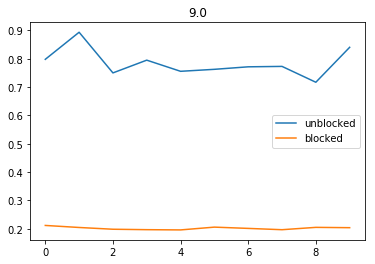

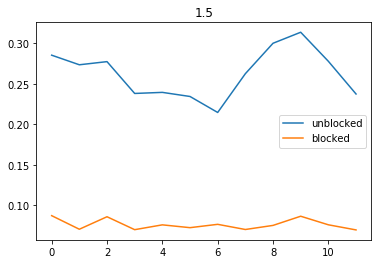

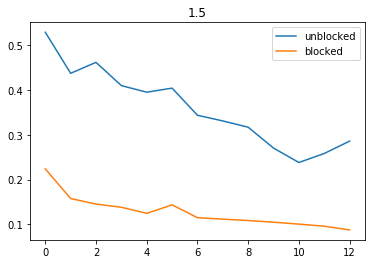

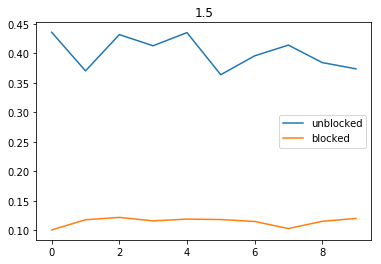

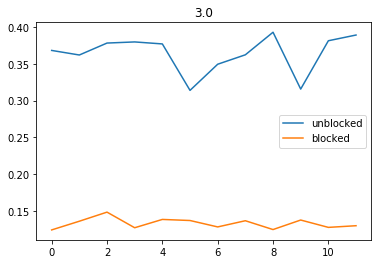

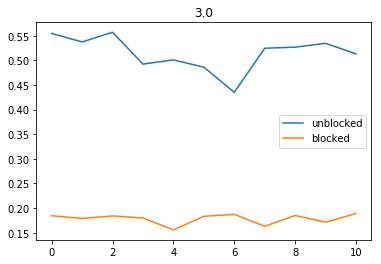

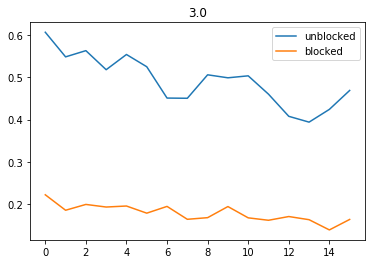

In [105]:
cell_intOD_b = []
cell_intOD_ub = []
cell_std_b = []
cell_std_ub = []
for _b,_ub,_iv in zip(cell_b,cell_ub,iv):
    _b = np.array(_b)
    _ub = np.array(_ub)
    plt.figure()
    plt.title('{}'.format(_iv))
    plt.plot(_ub,label='unblocked')
    plt.plot(_b,label='blocked')
    plt.legend(loc='best')
    cell_intOD_b.append(_b.mean())
    cell_intOD_ub.append(_ub.mean())                  
    cell_std_b.append(_b.std())
    cell_std_ub.append(_ub.std())

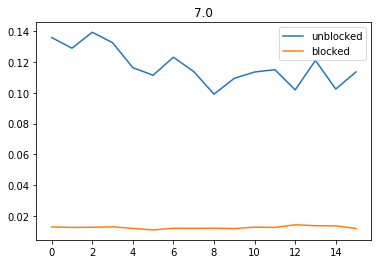

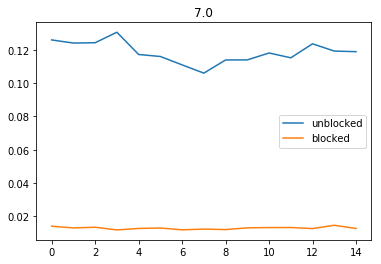

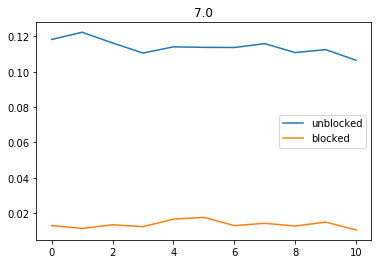

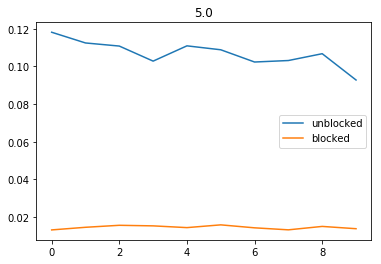

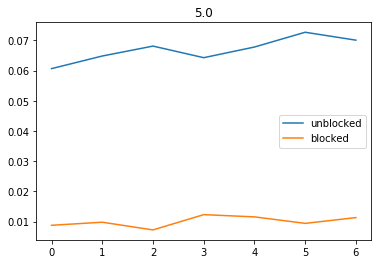

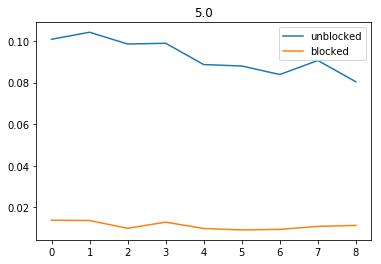

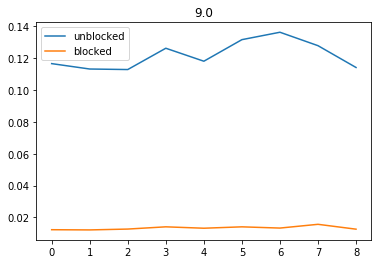

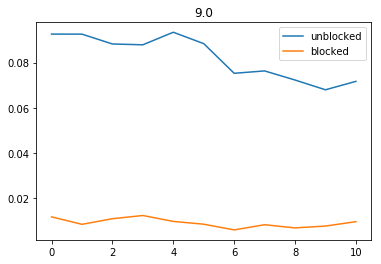

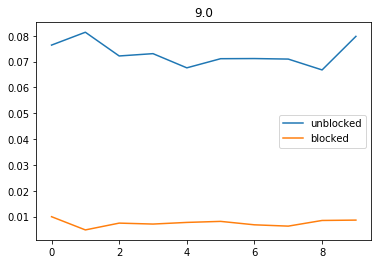

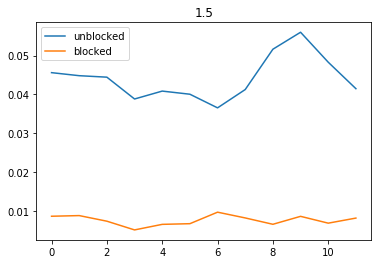

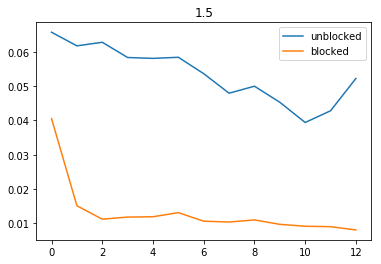

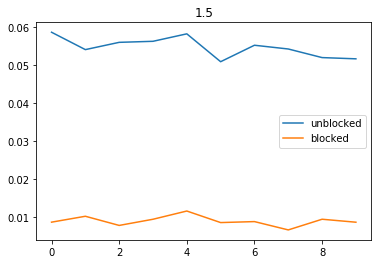

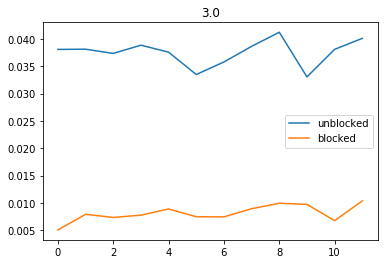

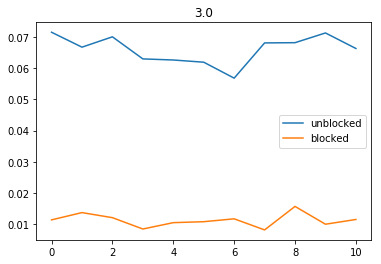

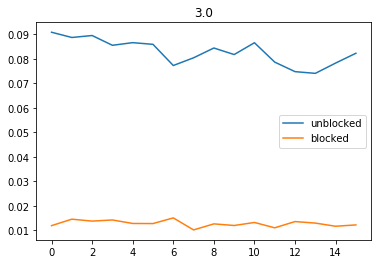

In [106]:
front_intOD_b = []
front_intOD_ub = []
front_std_b = []
front_std_ub = []
for _b,_ub,_iv in zip(front_b,front_ub,iv):
    _b = np.array(_b)
    _ub = np.array(_ub)
    plt.figure()
    plt.title('{}'.format(_iv))
    plt.plot(_ub,label='unblocked')
    plt.plot(_b,label='blocked')
    plt.legend(loc='best')
    front_intOD_b.append(_b.mean())
    front_intOD_ub.append(_ub.mean())                  
    front_std_b.append(_b.std())
    front_std_ub.append(_ub.std())

In [107]:
cell_b_sort = np.array(sortData(iv,cell_intOD_b))
cellstd_b_sort = np.array(sortData(iv,cell_std_b))
cell_ub_sort = np.array(sortData(iv,cell_intOD_ub))
cellstd_ub_sort = np.array(sortData(iv,cell_std_ub))
iv_sort = np.array(sorted(iv))

In [108]:
front_b_sort = np.array(sortData(iv,front_intOD_b))
frontstd_b_sort = np.array(sortData(iv,front_std_b))
front_ub_sort = np.array(sortData(iv,front_intOD_ub))
frontstd_ub_sort = np.array(sortData(iv,front_std_ub))
iv_sort = np.array(sorted(iv))

In [109]:
lbls = ['Gas Flow (SCCM)','Blocked Integrated OD (ms)','Blocked StDev (ms)','Unblocked Integrated OD (ms)','Unblocked StDev (ms)']
data = np.array([np.array(iv_sort),np.array(cell_b_sort),np.array(cellstd_b_sort),np.array(cell_ub_sort),np.array(cellstd_ub_sort)])
save_all = []
save_all.append(lbls)
for _data in data.T:
    save_all.append(_data)
writeCSVrows(save_all,'Processed_20190329/InCell_YbOH_vs_Gas_430mW.csv')

Done! Array written to Processed_20190329/InCell_YbOH_vs_Gas_430mW.csv


In [110]:
lbls = ['Gas Flow (SCCM)','Blocked Integrated OD (ms)','Blocked StDev (ms)','Unblocked Integrated OD (ms)','Unblocked StDev (ms)']
data = np.array([np.array(iv_sort),np.array(front_b_sort),np.array(frontstd_b_sort),np.array(front_ub_sort),np.array(frontstd_ub_sort)])
save_all = []
save_all.append(lbls)
for _data in data.T:
    save_all.append(_data)
writeCSVrows(save_all,'Processed_20190329/FrontofCell_YbOH_vs_Gas_430mW.csv')

Done! Array written to Processed_20190329/FrontofCell_YbOH_vs_Gas_430mW.csv


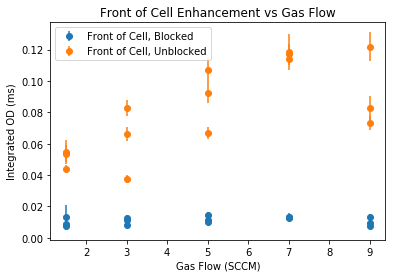

In [111]:
plt.figure()
plt.title('Front of Cell Enhancement vs Gas Flow')
plt.xlabel('Gas Flow (SCCM)')
plt.ylabel('Integrated OD (ms)')
plt.errorbar(iv_sort,front_b_sort,yerr=frontstd_b_sort,marker='o',linestyle='None',label='Front of Cell, Blocked')
plt.errorbar(iv_sort,front_ub_sort,yerr=frontstd_ub_sort,marker='o',linestyle='None',label='Front of Cell, Unblocked')
plt.legend(loc='best')

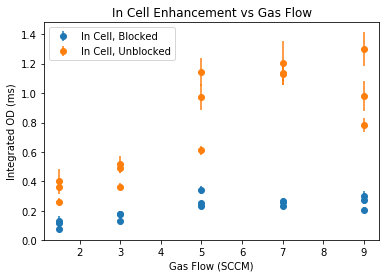

In [112]:
plt.figure()
plt.title('In Cell Enhancement vs Gas Flow')
plt.xlabel('Gas Flow (SCCM)')
plt.ylabel('Integrated OD (ms)')
plt.errorbar(iv_sort,cell_b_sort,yerr=cellstd_b_sort,marker='o',linestyle='None',label='In Cell, Blocked')
plt.errorbar(iv_sort,cell_ub_sort,yerr=cellstd_ub_sort,marker='o',linestyle='None',label='In Cell, Unblocked')
plt.legend(loc='best')

In [113]:
ex_ub = []
exerr_ub = []
ex_b = []
exerr_b = []
for _cell_b,_cellstd_b,_cell_ub,_cellstd_ub,_front_b,_frontstd_b,_front_ub,_frontstd_ub,_iv in zip(cell_b_sort,cellstd_b_sort,cell_ub_sort,cellstd_ub_sort,front_b_sort,frontstd_b_sort,front_ub_sort,frontstd_ub_sort,iv_sort):
    _ex_ub = _front_ub/_cell_ub
    _ex_b = _front_b/_cell_b
    _exerr_ub = _ex_ub*np.sqrt((_cellstd_ub/_cell_ub)**2+(_frontstd_ub/_front_ub)**2)
    _exerr_b = _ex_b*np.sqrt((_cellstd_b/_cell_b)**2+(_frontstd_b/_front_b)**2)
    ex_ub.append(_ex_ub)
    ex_b.append(_ex_b)
    exerr_ub.append(_exerr_ub)
    exerr_b.append(_exerr_b)

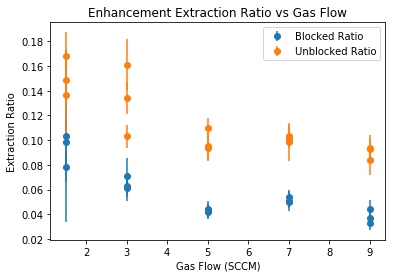

In [114]:
plt.figure()
plt.title('Enhancement Extraction Ratio vs Gas Flow')
plt.xlabel('Gas Flow (SCCM)')
plt.ylabel('Extraction Ratio')
plt.errorbar(iv_sort,ex_b,yerr=exerr_b,marker='o',linestyle='None',label='Blocked Ratio')
plt.errorbar(iv_sort,ex_ub,yerr=exerr_ub,marker='o',linestyle='None',label='Unblocked Ratio')
plt.legend(loc='best')

Read data from saved file

In [5]:
results=readCSVcolumns('Processed_20190329/FrontofCell_YbOH_vs_Gas_84mW.csv',skip_header=1)
header = results[1]
print(header)
[gas,front_b,front_std_b,front_ub,front_std_ub] = results[0]

Done! Array read from Processed_20190329/FrontofCell_YbOH_vs_Gas_84mW.csv
[['Gas Flow (SCCM)', 'Blocked Integrated OD (ms)', 'Blocked StDev (ms)', 'Unblocked Integrated OD (ms)', 'Unblocked StDev (ms)']]


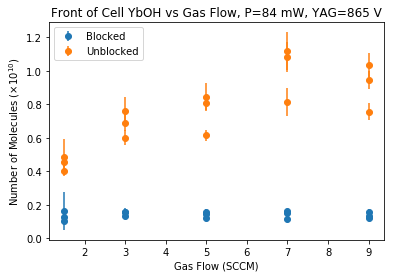

In [6]:
factor = 1.158*10 #1.158 * 10^11 /ms
plt.figure()
plt.title('Front of Cell YbOH vs Gas Flow, P=84 mW, YAG=865 V')
plt.xlabel('Gas Flow (SCCM)')
plt.ylabel(r'Number of Molecules ($\times 10^{10}$)')
plt.errorbar(gas,factor*front_b,yerr=factor*front_std_b,marker='o',linestyle='None',label='Blocked')
plt.errorbar(gas,factor*front_ub,yerr=factor*front_std_ub,marker='o',linestyle='None',label='Unblocked')
plt.legend(loc='best')

In [11]:
results=readCSVcolumns('Processed_20190329/Enhancement_InCell_FrontCell_vs_Gas_84mW.csv',skip_header=1)
header = results[1]
print(header)
[gas_84,cell_84,cell_std_84,front_84,front_std_84] = results[0]

Done! Array read from Processed_20190329/Enhancement_InCell_FrontCell_vs_Gas_84mW.csv
[['Gas Flow (SCCM)', 'In Cell Enhancement', 'In Cell StDev', 'Front of Cell Enhancement', 'Front of Cell StDev']]


In [12]:
results=readCSVcolumns('Processed_20190329/Enhancement_InCell_FrontCell_vs_Gas_430mW.csv',skip_header=1)
header = results[1]
print(header)
[gas_430,cell_430,cell_std_430,front_430,front_std_430] = results[0]

Done! Array read from Processed_20190329/Enhancement_InCell_FrontCell_vs_Gas_430mW.csv
[['Gas Flow (SCCM)', 'In Cell Enhancement', 'In Cell StDev', 'Front of Cell Enhancement', 'Front of Cell StDev']]


In [13]:
results=readCSVcolumns('Processed_20190329/Enhancement_InCell_FrontCell_vsGas_P220mW.csv',skip_header=1)
header = results[1]
print(header)
[gas_220,cell_220,cell_std_220,front_220,front_std_220] = results[0]

Done! Array read from Processed_20190329/Enhancement_InCell_FrontCell_vsGas_P220mW.csv
[['Gas Flow (SCCM)', 'In Cell Enhancement', 'In Cell StDev', 'Front of Cell Enhancement', 'Front of Cell StDev']]


In [14]:
gas_84

array([1.5, 1.5, 1.5, 3. , 3. , 3. , 5. , 5. , 5. , 7. , 7. , 7. , 9. ,
       9. , 9. ])

<ErrorbarContainer object of 3 artists>

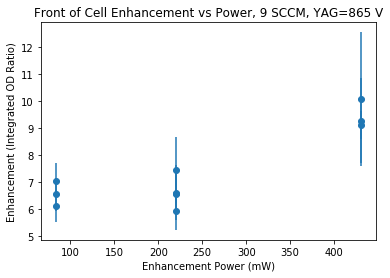

In [30]:
front_sccm = []
front_std_sccm = []
cell_sccm = []
cell_std_sccm = []
power = []

sccm = 9


for g,front,frontstd,cell,cellstd in zip(gas_84,front_84,front_std_84,cell_84,cell_std_84):
    if g == sccm:
        front_sccm.append(front)
        front_std_sccm.append(frontstd)
        cell_sccm.append(cell)
        cell_std_sccm.append(cellstd)
        power.append(84)
        
for g,front,frontstd,cell,cellstd in zip(gas_220,front_220,front_std_220,cell_220,cell_std_220):
    if g == sccm:
        front_sccm.append(front)
        front_std_sccm.append(frontstd)
        cell_sccm.append(cell)
        cell_std_sccm.append(cellstd)
        power.append(220)
        
for g,front,frontstd,cell,cellstd in zip(gas_430,front_430,front_std_430,cell_430,cell_std_430):
    if g == sccm:
        front_sccm.append(front)
        front_std_sccm.append(frontstd)
        cell_sccm.append(cell)
        cell_std_sccm.append(cellstd)
        power.append(430)
plt.figure()
plt.title('Front of Cell Enhancement vs Power, {} SCCM, YAG=865 V'.format(sccm))
plt.xlabel('Enhancement Power (mW)')
plt.ylabel('Enhancement (Integrated OD Ratio)')
plt.errorbar(power,front_sccm,yerr=front_std_sccm,marker='o',linestyle='None')

<ErrorbarContainer object of 3 artists>

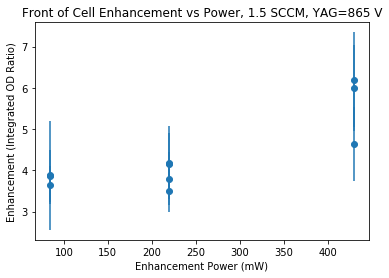